In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
import string
import re

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nidhipatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nidhipatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
pip install --upgrade executing parso jedi


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
df=pd.read_csv("../Redditposts.csv",skiprows=3)
df=df.drop(columns='Unnamed: 6')

In [8]:
df.head()

,Title,Upvotes,Comments,URL,Text,Created At
0,Survey on Opioids,1,0,https://www.surveymonkey.com/r/3GKCMH8,NaN,12/4/18 18:54
1,8-year-old dies after mistaking meth for break...,1,1,http://abc13.com/8-year-old-dies-after-mistaki...,NaN,8/4/18 21:49
2,Ohio police chief fatally overdosed on drugs t...,3,0,http://www.foxnews.com/us/2018/08/02/ohio-poli...,NaN,8/3/18 17:00
3,Why Heroin Addicts Are Being Charged With Murder,1,0,https://www.rollingstone.com/culture/culture-f...,NaN,8/3/18 0:02
4,"Health Care, And The Price Tag On Bernie Sande...",1,2,http://www.wbur.org/onpoint/2018/08/02/health-...,NaN,8/2/18 16:22


EDA

In [9]:
df.shape

(2895, 6)

In [10]:
print(df.isnull().sum())

Title            0
Upvotes          0
Comments         0
URL              0
Text          1024
Created At       0
dtype: int64


In [11]:
print(df[df['Text'].isnull()])

                                                  Title  Upvotes  Comments  \
0                                     Survey on Opioids        1         0   
1     8-year-old dies after mistaking meth for break...        1         1   
2     Ohio police chief fatally overdosed on drugs t...        3         0   
3      Why Heroin Addicts Are Being Charged With Murder        1         0   
4     Health Care, And The Price Tag On Bernie Sande...        1         2   
...                                                 ...      ...       ...   
2605  are there any RCs that aren't terrible for tol...        5        12   
2651  I would like to hear voices on this. Warnings ...       16         8   
2677  A plug that I often get fentanyl from says he ...        9        25   
2730          Upcoming Research Chemicals ban list 2024        7        21   
2781  Best rc for no tolerance besides tianeptine? O...        4        40   

                                                    URL Text   

Summary Statistics

In [12]:
print(df.describe())
print(df.info())

           Upvotes     Comments
count  2895.000000  2895.000000
mean      4.465630    12.594819
std      10.613104    20.896789
min       0.000000     0.000000
25%       1.000000     0.000000
50%       1.000000     4.000000
75%       4.000000    17.000000
max     272.000000   231.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       2895 non-null   object
 1   Upvotes     2895 non-null   int64 
 2   Comments    2895 non-null   int64 
 3   URL         2895 non-null   object
 4   Text        1871 non-null   object
 5   Created At  2895 non-null   object
dtypes: int64(2), object(4)
memory usage: 135.8+ KB
None


/Users/nidhipatel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


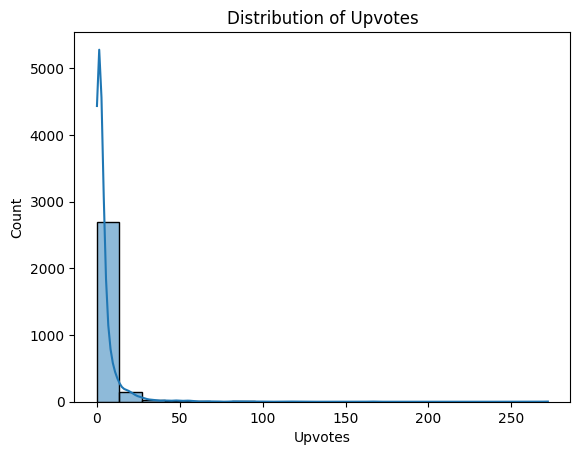

/Users/nidhipatel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


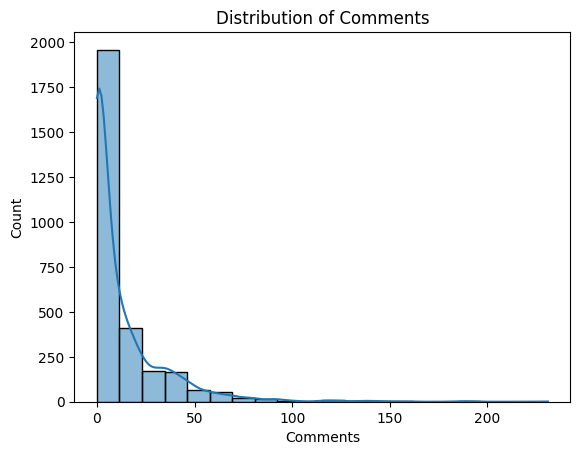

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Upvotes distribution
sns.histplot(df['Upvotes'], bins=20, kde=True)
plt.title('Distribution of Upvotes')
plt.show()

# Comments distribution
sns.histplot(df['Comments'], bins=20, kde=True)
plt.title('Distribution of Comments')
plt.show()


In [14]:
import praw
import pandas as pd

# Initialize the Reddit API
reddit = praw.Reddit(
    client_id='q9B_ymm5vW_3Fb-0pm-r9w', 
    client_secret='dF8iPqxbABZ_5QPGqTrTc2Qtc9cRyg', 
    user_agent='myredditscript'
)

# Define subreddits and parameters
subreddits = ["opiates", "drugs", "harmreduction","AmericanDrugEpidemic"]
posts = []

for subreddit in subreddits:
    for post in reddit.subreddit(subreddit).hot(limit=10000):  # Collect top 100 posts
        posts.append({
            "Title": post.title,
            "Text": post.selftext,
            "Upvotes": post.score,
            "Comments": post.num_comments,
            "Created At": pd.to_datetime(post.created_utc, unit='s')
        })

# Convert to DataFrame
df = pd.DataFrame(posts)
df.to_csv("reddit_posts.csv", index=False)
print("Data collection complete. Saved as reddit_posts.csv.")


Data collection complete. Saved as reddit_posts.csv.


In [15]:
df.head()

,Title,Text,Upvotes,Comments,Created At
0,Remember the point of this subreddit: HARM RED...,I just wanted to take a second and remind ever...,103,46,2024-10-19 00:44:55
1,Alone and using?,If anyone is out there alone and you’re about ...,1051,390,2022-12-10 07:15:23
2,Oxy is better than friends/girls,"Of course that is just my personal opinion,aft...",10,65,2025-01-26 08:40:23
3,Poppy cascade,I feel like most people don't even realize tha...,7,5,2025-01-26 08:33:33
4,I love nodding,One of my favorite part of the opioid high is ...,54,40,2025-01-25 20:35:42


In [16]:
df.shape

(3511, 5)

In [17]:
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

def preprocess_text(text):
    if not text:
        return ""
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations]
    return " ".join(tokens)

# Preprocess title and text columns
df["Cleaned_Text"] = df["Title"] + " " + df["Text"]
df["Cleaned_Text"] = df["Cleaned_Text"].apply(preprocess_text)
df.to_csv("cleaned_reddit_posts.csv", index=False)
print("Text preprocessing complete.")

Text preprocessing complete.


In [18]:
df.head()

,Title,Text,Upvotes,Comments,Created At,Cleaned_Text
0,Remember the point of this subreddit: HARM RED...,I just wanted to take a second and remind ever...,103,46,2024-10-19 00:44:55,remember point subreddit harm reduction wanted...
1,Alone and using?,If anyone is out there alone and you’re about ...,1051,390,2022-12-10 07:15:23,alone using anyone alone ’ use give us holler ...
2,Oxy is better than friends/girls,"Of course that is just my personal opinion,aft...",10,65,2025-01-26 08:40:23,oxy better friends/girls course personal opini...
3,Poppy cascade,I feel like most people don't even realize tha...,7,5,2025-01-26 08:33:33,poppy cascade feel like people n't even realiz...
4,I love nodding,One of my favorite part of the opioid high is ...,54,40,2025-01-25 20:35:42,love nodding one favorite part opioid high nod...


In [26]:
from bertopic import BERTopic

# Fit BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df["Cleaned_Text"])

# Add topics to the DataFrame
df["Topic"] = topics
df["Topic_Probability"] = probs

# Save topic model
topic_model.save("bertopic_model")
df.to_csv("reddit_with_topics.csv", index=False)

# Visualize topics
topic_model.visualize_barchart()
topic_model.visualize_topics()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/nidhipatel/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/3b/bvbfqhp97x1_8_vm1_xyzdwh0000gn/T/ipykernel_93746/3078314741.py", line 1, in <module>
    from bertopic import BERTopic
  File "/Users/nidhipatel/anaconda3/lib/python3.11/site-packages/bertopic/__init__.py", line 3, in <module>
    from bertopic._bertopic import BERTopic
  File "/Users/nidhipatel/anaconda3/lib/python3.11/site-packages/bertopic/_bertopic.py", line 41, in <module>
    from umap import UMAP
  File "/Users/nidhipatel/anaconda3/lib/python3.11/site-packages/umap/__init__.py", line 2, in <module>
    from .umap_ import UMAP
  File "/Users/nidhipatel/anaconda3/lib/python3.11/site-packages/umap/umap_.py", line 29, in <module>
    import numba
  File "/Users/nidhipatel/anaconda3/lib/python3.11/site-packages/numba/__init__.py", line 59, in <module>


In [24]:
pip uninstall numpy
pip install numpy==1.24.3

SyntaxError: invalid syntax (853692609.py, line 1)

In [25]:
pip install --force-reinstall bertopic

  Using cached numpy-2.2.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached scipy-1.15.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.4 MB/s eta 0:00:00a 0:00:01
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 4.1 MB/s eta 0:00:0000:0100:01
Using cached scipy-1.15.1-cp311-cp311-macosx_14_0_arm64.whl (24.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 7.6 MB/s eta 0:00:0000:0100:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 15.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 7.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 21.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.3.post1
    Uninstalling pytz-2023.3.post1:
      Successfully uninstalled pytz-2023.3.post1
  Attempting uninstall: mpmath
    Found existing installation: mpmath 1.3.0
    Uninstalling mpmath-1.3.0:
      Successfully uninstalled mpmath-1.3.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.16
    Uninstalling url

  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: pynndescent
    Found existing installation: pynndescent 0.5.13
    Uninstalling pynndescent-0.5.13:
      Successfully uninstalled pynndescent-0.5.13
  Attempting uninstall: hdbscan
    Found existing installation: hdbscan 0.8.40
    Uninstalling hdbscan-0.8.40:
      Successfully uninstalled hdbscan-0.8.40
  Attempting uninstall: umap-learn
    Found existing installation: umap-learn 0.5.7
    Uninstalling umap-learn-0.5.7:
      Successfully uninstalled umap-learn-0.5.7
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.1
    Uninstalling transformers-4.48.1:
      Successfully uninstalled transformers-4.48.1
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.0
    Uninstalling sentence-transformers-3.